In [1]:
import numpy as np
from fuchs_model import *

In [2]:
thickness = 0.5e-6 * np.ones(1000)
intens = 1e23 * np.ones(1000)
contra = 1e-7 * np.ones(1000)
foci = np.linspace(-30e-6, 30e-6, 1000)

tmp = fuchs_function_with_prepulse(intens, foci, thickness,contrast=contra,t0=.06e-9, pct_noise=0, spectrum=False)
noisy_max_proton_energy = tmp[0]
noisy_total_proton_energy = tmp[1]
noisy_average_proton_energy = tmp[2]
efficiency = tmp[3]
laser_energy = tmp[4]
max_proton_energy = tmp[5]
total_proton_energy = tmp[6]
average_proton_energy = tmp[7]

df = pd.DataFrame({'Intensity': intens, 'Focal Distance': foci, 'Target Thickness': thickness, 'Contrast': contra, 'Max Proton Energy': max_proton_energy, 'Total Proton Energy': total_proton_energy, 'Average Proton Energy': average_proton_energy, 'Noisy Max Proton Energy': noisy_max_proton_energy, 'Noisy Total Proton Energy': noisy_total_proton_energy, 'Noisy Average Proton Energy': noisy_average_proton_energy})
max_proton_energy_max = df['Max Proton Energy'].max()
focal_distance_max = df.loc[df['Max Proton Energy'] == max_proton_energy_max, 'Focal Distance'].values[0]
focal_distance_max

Shape (1000, 10)


1.1561561561561564e-05

In [3]:
df

,Intensity,Focal Distance,Target Thickness,Contrast,Max Proton Energy,Total Proton Energy,Average Proton Energy,Noisy Max Proton Energy,Noisy Total Proton Energy,Noisy Average Proton Energy
0,1.000000e+23,-0.00003,5.000000e-07,1.000000e-07,1.438382,1.685175e+09,0.135830,1.438382,1.685175e+09,0.135830
1,1.000000e+23,-0.00003,5.000000e-07,1.000000e-07,1.440875,1.687890e+09,0.136020,1.440875,1.687890e+09,0.136020
2,1.000000e+23,-0.00003,5.000000e-07,1.000000e-07,1.443371,1.690610e+09,0.136210,1.443371,1.690610e+09,0.136210
3,1.000000e+23,-0.00003,5.000000e-07,1.000000e-07,1.445871,1.693333e+09,0.136401,1.445871,1.693333e+09,0.136401
4,1.000000e+23,-0.00003,5.000000e-07,1.000000e-07,1.448374,1.696062e+09,0.136592,1.448374,1.696062e+09,0.136592
...,...,...,...,...,...,...,...,...,...,...
995,1.000000e+23,0.00003,5.000000e-07,1.000000e-07,1.448374,1.696062e+09,0.136592,1.448374,1.696062e+09,0.136592
996,1.000000e+23,0.00003,5.000000e-07,1.000000e-07,1.445871,1.693333e+09,0.136401,1.445871,1.693333e+09,0.136401
997,1.000000e+23,0.00003,5.000000e-07,1.000000e-07,1.443371,1.690610e+09,0.136210,1.443371,1.690610e+09,0.136210
998,1.000000e+23,0.00003,5.000000e-07,1.000000e-07,1.440875,1.687890e+09,0.136020,1.440875,1.687890e+09,0.136020


In [4]:
max_proton_energy_max

2.1241009515467324

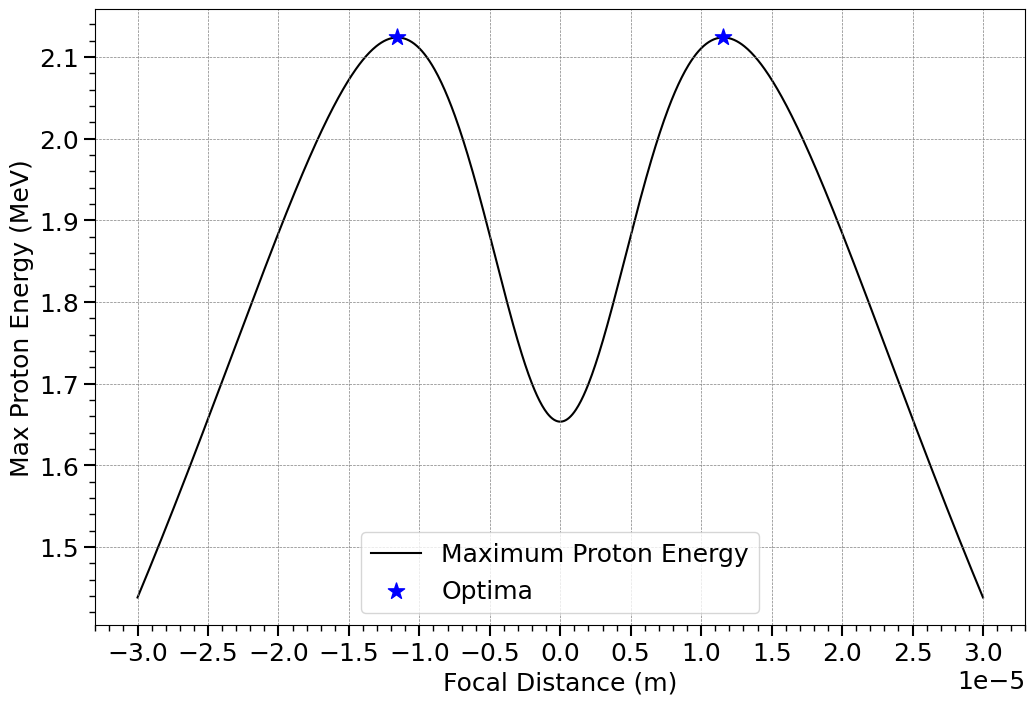

In [16]:
import matplotlib
from matplotlib.ticker import MultipleLocator
matplotlib.rcParams.update({'font.size': 18})

optimal_xs = [-focal_distance_max, focal_distance_max]
optimal_ys = [max_proton_energy_max, max_proton_energy_max]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(df['Focal Distance'], df['Max Proton Energy'], color='black', label='Maximum Proton Energy', zorder=1)
ax.scatter(optimal_xs, optimal_ys, color='blue', marker='*',s=150, label='Optima', zorder=2)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.set_xlabel('Focal Distance (m)')
ax.set_ylabel('Max Proton Energy (MeV)')
ax.xaxis.set_major_locator(MultipleLocator(base=5e-6))
ax.xaxis.set_minor_locator(MultipleLocator(base=1e-6))
ax.yaxis.set_major_locator(MultipleLocator(base=0.1))
ax.yaxis.set_minor_locator(MultipleLocator(base=0.02))
ax.tick_params(axis='both', which='major', length=8, width=1.5)
ax.tick_params(axis='both', which='minor', length=4, width=1)
ax.legend(loc='lower center')

In [17]:
fig.savefig('fuchs_max_energy_vs_focal_distance.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
